# SparkCognition - Response to Marketing Campaign

## Table of Contents
* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [Data Exploration](#Data-Exploration)
* [Train Test Split](#Train-Test-Split)

## Assignment

You are working for SparkCognition as a Data Scientist. SparkCognition has been commissioned by an insurance company to develop a tool to optimize their marketing efforts. They have given us a data set as a result of an email marketing campaign. The data set includes customer information, described below, as well as whether the customer responded to the marketing campaign or not.

Design a model that will be able to predict whether a customer will respond to the marketing campaign based on his/her information. In other words, predict the responded target variable described above based on all the input variables provided.

Briefly answer the following questions:

1. Describe your model and why did you choose this model over other types of models?
2. Describe any other models you have tried and why do you think this model preforms better?
3. How did you handle missing data?
4. How did you handle categorical (string) data?
5. How did you handle unbalanced data?
6. How did you test your model?

## Data Description
**Files:**

`marketing_training.csv` = Contains the training set that you will use to build the model. The target variable is responded.


`marketing_test.csv` = Contains testing data where the input variables are provided but not the responded target column.

**Descriptions of each column:** 


`custAge` = The age of the customer (in years)


`profession` = Type of job


`marital` = Marital status


`schooling` = Education level


`default` = Has a previous defaulted account?


`housing` = Has a housing loan?


`contact` = Preferred contact type


`month` = Last contact month


`day_of_week` = Last contact day of week


`ampaign` = Number of times the customer was contacted


`pdays` = Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previous contacted)


`previous` = Number of contacts performed before this campaign for this client


`poutcome` = Outcome of the previous marketing campaign


`emp.var.rate` = Employment variation rate - quartlerly indicator


`cons.price.idx` = Consumer price index - monthly indicator


`cons.conf.idx` = Consumer confidence index - monthly indicator


`euribor3m` = Euribor 3 months rate - daily indicator


`nr.employed` = Number of employees - quarterly indicator


`pmonths` = Number of months that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previous contacted)


`pastEmail` = Number of previous emails sent to this user


`responded` = Did the customer respond to the marketing campaign and purchase a policy?


## Data Exploration

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
marketing_training = pd.read_csv('marketing_training.csv')
marketing_training.head(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no


In [97]:
marketing_test = pd.read_csv('marketing_test.csv')
marketing_test.head(3)

,Unnamed: 0,custAge,profession,marital,schooling,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,NaN,entrepreneur,married,university.degree,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0
1,1,58.0,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0
2,2,48.0,entrepreneur,married,NaN,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0


In [98]:
marketing_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

We have so many NULL values. 

In [99]:
marketing_training.nunique()

custAge            72
profession         12
marital             4
schooling           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           33
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         272
nr.employed        11
pmonths            21
pastEmail          16
responded           2
dtype: int64

In [100]:
marketing_training['responded'].unique()

array(['no', 'yes'], dtype=object)

In [101]:
marketing_training['responded'].loc[marketing_training['responded'] == 'no'] = 0
marketing_training['responded'].loc[marketing_training['responded'] == 'yes'] = 1
marketing_training['responded'] = marketing_training['responded'].astype('int64')

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/3775155180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['responded'].loc[marketing_training['responded'] == 'no'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/3775155180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['responded'].loc[marketing_training['responded'] == 'yes'] = 1


Responded(0 = no, 1 = yes): [0 1]


[Text(0, 0, '6574'), Text(0, 0, '840')]

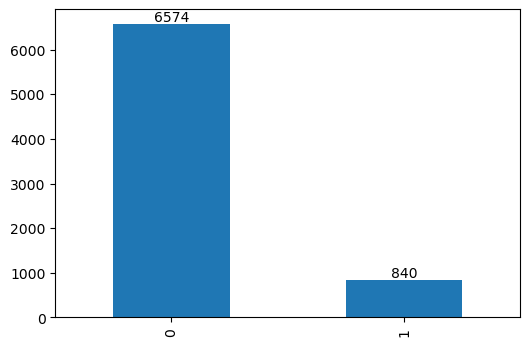

In [102]:
print(f'Responded(0 = no, 1 = yes): {marketing_training.responded.unique()}')

# Visualize the distribution of each category
ax = marketing_training['responded'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])

In [103]:
marketing_training['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [104]:
marketing_training['housing'].loc[marketing_training['housing'] == 'unknown'] = 0
marketing_training['housing'].loc[marketing_training['housing'] == 'no'] = 1
marketing_training['housing'].loc[marketing_training['housing'] == 'yes'] = 2
marketing_training['housing'] = marketing_training['housing'].astype('int64')

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/300400647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['housing'].loc[marketing_training['housing'] == 'unknown'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/300400647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['housing'].loc[marketing_training['housing'] == 'no'] = 1
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/300400647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

Housing(0 = unknown, 1 = no, 2 = yes): [1 2 0]


[Text(0, 0, '3840'), Text(0, 0, '3406'), Text(0, 0, '168')]

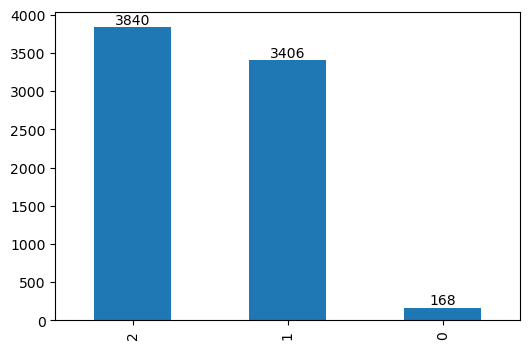

In [105]:
print(f'Housing(0 = unknown, 1 = no, 2 = yes): {marketing_training.housing.unique()}')

# Visualize the distribution of each category
ax = marketing_training['housing'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])

In [106]:
marketing_training['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [107]:
marketing_training['loan'].loc[marketing_training['loan'] == 'unknown'] = 0
marketing_training['loan'].loc[marketing_training['loan'] == 'no'] = 1
marketing_training['loan'].loc[marketing_training['loan'] == 'yes'] = 2
marketing_training['loan'] = marketing_training['loan'].astype('int64')

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/1756731846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['loan'].loc[marketing_training['loan'] == 'unknown'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/1756731846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['loan'].loc[marketing_training['loan'] == 'no'] = 1
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/1756731846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

Loan(0 = unknown, 1 = no, 2 = yes): [1 2 0]


[Text(0, 0, '6099'), Text(0, 0, '1147'), Text(0, 0, '168')]

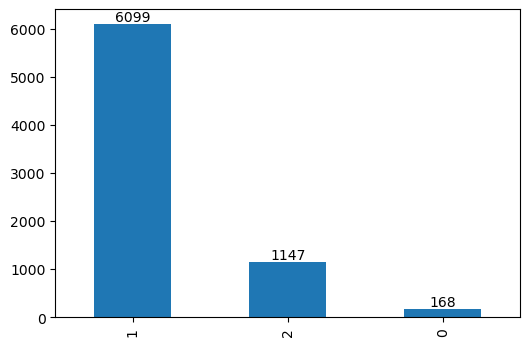

In [108]:
print(f'Loan(0 = unknown, 1 = no, 2 = yes): {marketing_training.loan.unique()}')

# Visualize the distribution of each category
ax = marketing_training['loan'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])

In [109]:
marketing_training['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [110]:
marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'nonexistent'] = 0
marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'failure'] = 1
marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'success'] = 2
marketing_training['poutcome'] = marketing_training['poutcome'].astype('int64')

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/723239589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'nonexistent'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/723239589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'failure'] = 1
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_6194/723239589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Poutcome(0 = nonextistent, 1 = failure, 2 = success): [0 1 2]


[Text(0, 0, '6350'), Text(0, 0, '800'), Text(0, 0, '264')]

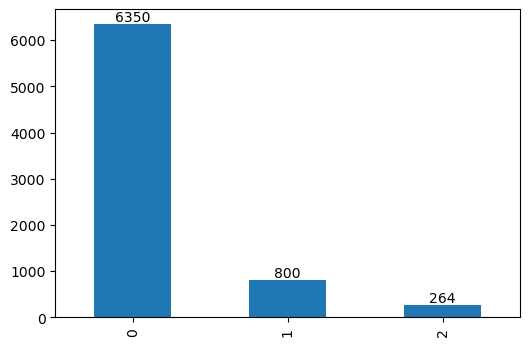

In [111]:
print(f'Poutcome(0 = nonextistent, 1 = failure, 2 = success): {marketing_training.poutcome.unique()}')

# Visualize the distribution of each category
ax = marketing_training['poutcome'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])

In [112]:
month = pd.get_dummies(marketing_training['month'])
month.head(3)

,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0


In [113]:
day_of_week = pd.get_dummies(marketing_training['day_of_week'])
day_of_week.head(3)

,fri,mon,thu,tue,wed
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0


In [114]:
profession = pd.get_dummies(marketing_training['profession'])
profession.head(3)

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0


In [115]:
marital = pd.get_dummies(marketing_training['marital'])
marital.head(3)

,divorced,married,single,unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0


In [116]:
marketing_training = marketing_training.dropna()
marketing_test = marketing_test.dropna()

In [117]:
marketing_training = marketing_training.drop(['profession','marital', 'month', 'schooling', 'default', 'contact', 'day_of_week'], axis = 1)

In [118]:
marketing_training.head()

,custAge,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,1,1,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
2,42.0,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
5,47.0,2,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
8,28.0,2,1,1,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,0
9,46.0,2,1,2,999,1,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0


## Train Test Split

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = marketing_training.drop(['responded'], axis = 1)
y = marketing_training['responded']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 2865 and the size of test data is 717


## Decision Tree Classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score

In [126]:
tree = DecisionTreeClassifier(random_state = 42)

tree.fit(X_train, y_train)

y_predict = tree.predict(X_test)

0.8437935843793585
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       645
           1       0.25      0.28      0.26        72

    accuracy                           0.84       717
   macro avg       0.58      0.59      0.59       717
weighted avg       0.85      0.84      0.85       717



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


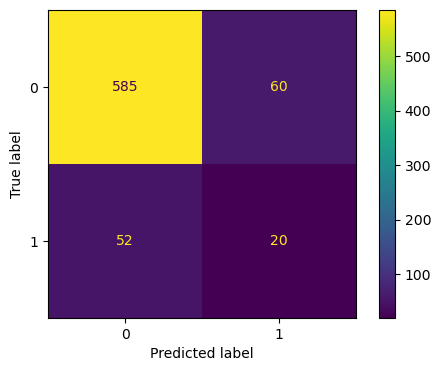

In [133]:
# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize = (6, 4))
plot_confusion_matrix(tree, X_test, y_test, ax = ax)

## Random Forest Classifier

0.8870292887029289
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       645
           1       0.37      0.18      0.24        72

    accuracy                           0.89       717
   macro avg       0.64      0.57      0.59       717
weighted avg       0.86      0.89      0.87       717



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


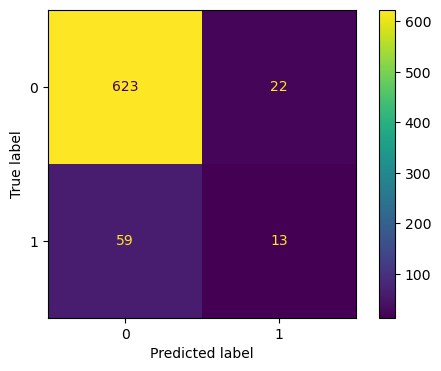

In [136]:
# Instantiate Random Forest Classifier
random_forest = RandomForestClassifier(random_state=2)

# Train Random Forest Classifier on training data
random_forest.fit(X_train, y_train)

# Predict test data with trained model
y_predict = random_forest.predict(X_test)

# Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix
fig, ax = plt.subplots(figsize = (6, 4))
plot_confusion_matrix(rf, X_test, y_test, ax = ax)

In [140]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

names = [
    "Nearest Neighbors",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3), 
    GaussianProcessClassifier(random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [141]:

from sklearn.metrics import f1_score

for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

accuracy: 0.88 f1_score: 0.61 Model: Nearest Neighbors
accuracy: 0.88 f1_score: 0.59 Model: Gaussian Process
accuracy: 0.89 f1_score: 0.53 Model: Decision Tree
accuracy: 0.90 f1_score: 0.57 Model: Random Forest
accuracy: 0.90 f1_score: 0.58 Model: Neural Net
accuracy: 0.90 f1_score: 0.61 Model: AdaBoost
accuracy: 0.83 f1_score: 0.58 Model: Naive Bayes
accuracy: 0.86 f1_score: 0.61 Model: QDA
accuracy: 0.89 f1_score: 0.58 Model: XGBoost
accuracy: 0.90 f1_score: 0.63 Model: LightGBM
